In [1]:
#Problem - 1: Perform a classification task with knn from scratch.
import pandas as pd
#1. Load the Dataset:
#• Read the dataset into a pandas DataFrame.
dataset = pd.read_csv("diabetes.csv")


In [4]:
#• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).
dataset.head(6)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [3]:
#chack values
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#2. Handle Missing Data:
#• Handle any missing values appropriately, either by dropping or imputing them based on the data.  
dataset.fillna(dataset.mean(), inplace = True)
print(dataset.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
#3. Feature Engineering:
import numpy as np
#• Separate the feature matrix (X) and target variable (y).
X = dataset.iloc[:, :-1].values  # All columns except the last
y = dataset.iloc[:, -1].values   # The last column


In [10]:
#• Perform a train - test split from scratch using a 70% − 30% ratio.
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]


Training Features:
 [[  1.    117.     60.    ...  33.8     0.466  27.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  4.     84.     90.    ...  39.5     0.159  25.   ]
 ...
 [  1.     79.     80.    ...  25.4     0.583  22.   ]
 [  2.    158.     90.    ...  31.6     0.805  66.   ]
 [  5.     99.     54.    ...  34.      0.499  30.   ]]
Training Labels:
 [0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1
 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1
 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 0

In [11]:
#4. Implement KNN:
#• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
#• Compute distances using Euclidean distance.
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
    


In [12]:
#• Write functions for:
#– Predicting the class for a single query.
def predict_single(query_point, X_train, y_train, k):
    #Calculate the distance of the query point from all training points.
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query_point, X_train[i])
        distances.append((dist, y_train[i]))
    
    #Sort the distances and select the k smallest ones.
    distances.sort(key=lambda x: x[0])
    
    #Take the majority class among the k nearest neighbors.
    k_neighbors = [distances[i][1] for i in range(k)]
    
    # Return the majority class
    return max(set(k_neighbors), key=k_neighbors.count)


In [13]:
#– Predicting classes for all test samples.
def predict(X_test, X_train, y_train, k):
    predictions = []
    for query_point in X_test:
        predictions.append(predict_single(query_point, X_train, y_train, k))
    return predictions


In [14]:
#• Evaluate the performance using accuracy.
def accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    return correct / len(y_true)


In [16]:
# Implementing KNN from Scratch
k = 8  # You can choose any value for k

# Make predictions
y_pred = predict(X_test, X_train, y_train, k)

# Evaluate accuracy
acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.7056277056277056


In [17]:
#Problem - 2 - Experimentation:
#1. Repeat the Classification Task:
#• Scale the Feature matrix X.
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
#• Use the scaled data for training and testing the kNN Classifier.
# KNN with original data (No scaling)
k = 3  # You can choose k=3 for example
y_pred_original = predict(X_test, X_train, y_train, k)
acc_original = accuracy(y_test, y_pred_original)
print("Accuracy on original data:", acc_original)

# KNN with scaled data
y_pred_scaled = predict(X_test_scaled, X_train_scaled, y_train, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
print("Accuracy on scaled data:", acc_scaled)


Accuracy on original data: 0.6883116883116883
Accuracy on scaled data: 0.7272727272727273


In [ ]:
#• Discuss:
#– How scaling impacted the KNN performance.
#– The reason for any observed changes in accuracy.

Scaling helps KNN by ensuring all features contribute equally to the distance calculation. Without scaling, features with larger ranges dominate the distance calculation. If scaling improves accuracy, KNN has benefited from equal feature contribution. If there’s little or no difference, the dataset might not need scaling, or the KNN algorithm might not be sensitive to scaling.

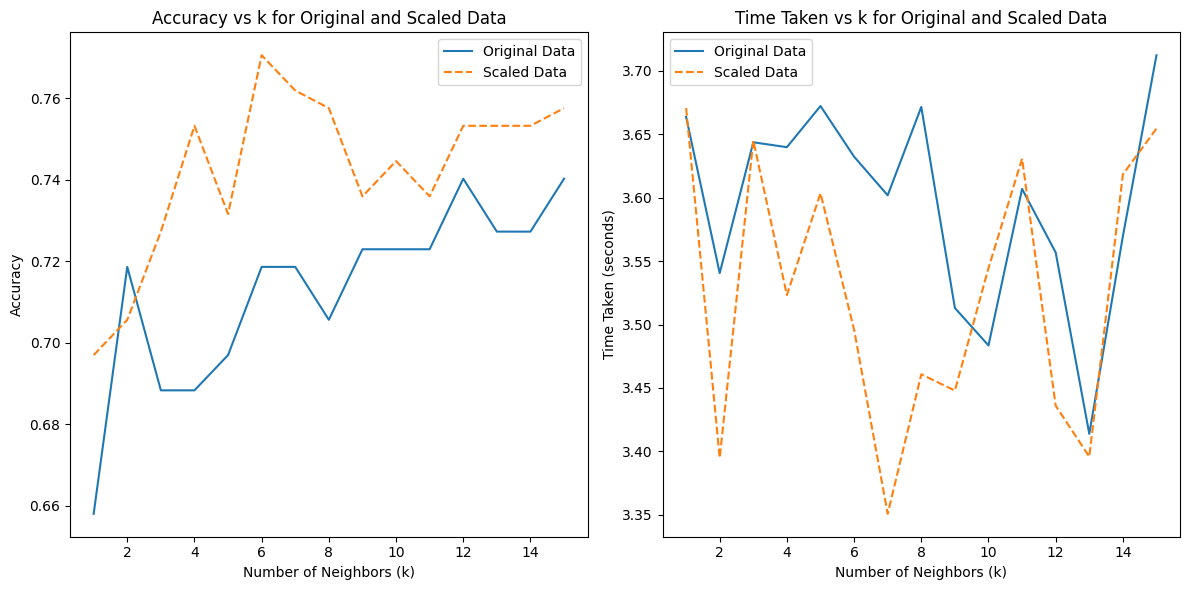

In [19]:
#Problem - 3 - Experimentation with k:
#1. Vary the number of neighbors - k:
#• Run the KNN model on both the original and scaled datasets for a range of:

#k= 1, 2, 3, . . . 15

#• For each k, record:
#– Accuracy.
#– Time taken to make predictions.
#2. Visualize the Results:
#• Plot the following graphs:
#– k vs. Accuracy for original and scaled datasets.
#– k vs. Time Taken for original and scaled datasets.
#3. Analyze and Discuss:
#• Discuss how the choice of k affects the accuracy and computational cost.
#• Identify the optimal k based on your analysis.
import time
import matplotlib.pyplot as plt

k_values = range(1, 16)
acc_original_list = []
acc_scaled_list = []
time_original_list = []
time_scaled_list = []

# Loop over k values from 1 to 15
for k in k_values:
    # Measure time for original data
    start_time = time.time()
    y_pred_original = predict(X_test, X_train, y_train, k)
    acc_original = accuracy(y_test, y_pred_original)
    end_time = time.time()
    time_original_list.append(end_time - start_time)
    acc_original_list.append(acc_original)
    
    # Measure time for scaled data
    start_time = time.time()
    y_pred_scaled = predict(X_test_scaled, X_train_scaled, y_train, k)
    acc_scaled = accuracy(y_test, y_pred_scaled)
    end_time = time.time()
    time_scaled_list.append(end_time - start_time)
    acc_scaled_list.append(acc_scaled)

# Visualize the Results
plt.figure(figsize=(12, 6))

# Accuracy vs k
plt.subplot(1, 2, 1)
plt.plot(k_values, acc_original_list, label='Original Data')
plt.plot(k_values, acc_scaled_list, label='Scaled Data', linestyle='--')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for Original and Scaled Data')
plt.legend()

# Time vs k
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original_list, label='Original Data')
plt.plot(k_values, time_scaled_list, label='Scaled Data', linestyle='--')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken vs k for Original and Scaled Data')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
#3. Analyze and Discuss:
#• Discuss how the choice of k affects the accuracy and computational cost.
#• Identify the optimal k based on your analysis.

As k increases, the accuracy of the KNN model might increase or stabilize at a certain point. Smaller values of k can lead to overfitting (too specific to the training data), while larger k values might smooth over variations in the data. Increasing k also increases the computational cost because more neighbors need to be checked for each prediction. The graph showing time taken helps visualize this. From the graphs, identify the value of k where accuracy is maximized and time is reasonable. Typically, a smaller k value might be quicker but less accurate, while larger k might be slower but give better results.